**Problem Statement:**
Tujuan proyek adalah untuk melihat pantauan covid19 di jakarta dalam kurun waktu kurang lebih 3 tahun dan untuk mendapatkan hasil pantauan Covid19 yang berguna dan untuk mendukung pengambilan keputusan selanjutnya dimasa endemik. Sebagian besar proyek akan bersumber membuka data dari beberapa website dan youtube. Kegiatannya meliputi Clean data, Exploratory Data Analysis, dan Visualisasi hasil penemuan.

In [23]:
#Import beberapa library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Upload dan baca file excel
from google.colab import files
uploaded = files.upload()
df = pd.read_excel("Daily_Update_Data_Agregat_Covid-19_Jakarta.xlsx")
df.head()

Saving Daily_Update_Data_Agregat_Covid-19_Jakarta.xlsx to Daily_Update_Data_Agregat_Covid-19_Jakarta.xlsx


,Tanggal,Jam,Tanggal Jam,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
0,2020-03-01,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2020-03-02,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2020-03-03,NaN,NaN,1,0,0,2,3,3,2,0,NaN,NaN,NaN
3,2020-03-04,NaN,NaN,1,0,0,2,3,0,2,0,NaN,NaN,NaN
4,2020-03-05,NaN,NaN,3,0,0,4,7,4,4,0,NaN,NaN,NaN


In [25]:
#cek info dari file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Tanggal          851 non-null    datetime64[ns]
 1   Jam              0 non-null      float64       
 2   Tanggal Jam      0 non-null      float64       
 3   Meninggal        851 non-null    int64         
 4   Sembuh           851 non-null    int64         
 5   Self Isolation   851 non-null    int64         
 6   Masih Perawatan  851 non-null    int64         
 7   Total Pasien     851 non-null    int64         
 8   Positif Harian   851 non-null    int64         
 9   Positif Aktif    851 non-null    int64         
 10  Sembuh Harian    851 non-null    int64         
 11  Tanpa Gejala     711 non-null    float64       
 12  Bergejala        711 non-null    float64       
 13  Belum Ada Data   711 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(8)

In [24]:
#cek missing value
pd.isnull(df).sum()

Tanggal              0
Jam                851
Tanggal Jam        851
Meninggal            0
Sembuh               0
Self Isolation       0
Masih Perawatan      0
Total Pasien         0
Positif Harian       0
Positif Aktif        0
Sembuh Harian        0
Tanpa Gejala       140
Bergejala          140
Belum Ada Data     140
dtype: int64

In [26]:
#hapus kolom yang tidak diperlukan untuk mengatasi missing value
covid = df.drop(['Jam','Tanggal Jam','Self Isolation','Masih Perawatan',
                 'Tanpa Gejala','Bergejala','Belum Ada Data'], axis=1)
covid.head()

,Tanggal,Meninggal,Sembuh,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian
0,2020-03-01,0,0,0,0,0,0
1,2020-03-02,0,0,0,0,0,0
2,2020-03-03,1,0,3,3,2,0
3,2020-03-04,1,0,3,0,2,0
4,2020-03-05,3,0,7,4,4,0


In [27]:
#rename nama kolom
covid.rename(columns={'Positif Harian' : 'PositifHarian','Positif Aktif' : 'PositifAktif','Sembuh Harian':'SembuhHarian'}, inplace=True)
covid.head()

,Tanggal,Meninggal,Sembuh,Total Pasien,PositifHarian,PositifAktif,SembuhHarian
0,2020-03-01,0,0,0,0,0,0
1,2020-03-02,0,0,0,0,0,0
2,2020-03-03,1,0,3,3,2,0
3,2020-03-04,1,0,3,0,2,0
4,2020-03-05,3,0,7,4,4,0


In [28]:
#Urut naik SembuHarian
sorted = covid.sort_values('SembuhHarian', ascending=True).head(10)
sorted

,Tanggal,Meninggal,Sembuh,Total Pasien,PositifHarian,PositifAktif,SembuhHarian
0,2020-03-01,0,0,0,0,0,0
30,2020-03-31,84,49,741,14,608,0
60,2020-04-30,381,412,4138,105,3345,0
40,2020-04-10,156,82,1810,91,1572,0
19,2020-03-20,20,13,224,14,191,0
42,2020-04-12,195,142,2082,179,1745,0
43,2020-04-13,209,142,2242,160,1891,0
16,2020-03-17,12,0,122,25,110,0
15,2020-03-16,12,0,97,2,85,0
14,2020-03-15,11,0,95,16,84,0


In [29]:
#menampilkan deskriptif statistik data
covid.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Meninggal,851.0,7611.021152,5775.051802,0.0,1724.5,6733.0,13576.0,15314.0
Sembuh,851.0,498071.564042,437420.578239,0.0,59592.5,394939.0,849866.5,1243738.0
Total Pasien,851.0,518201.198590,445198.675857,0.0,73838.5,408620.0,863882.5,1268486.0
PositifHarian,851.0,1490.582844,2524.960889,0.0,131.0,661.0,1417.5,15825.0
PositifAktif,851.0,12518.613396,19487.041413,0.0,2315.0,7027.0,12535.5,113138.0
SembuhHarian,851.0,1461.501763,2746.850543,0.0,122.5,609.0,1297.5,20570.0


In [30]:
#Cek SembuhHarian > 15000
banyak_sembuh = covid.query("SembuhHarian > 15000", inplace=False).sort_values('SembuhHarian', ascending=False)
banyak_sembuh[:10]

,Tanggal,Meninggal,Sembuh,Total Pasien,PositifHarian,PositifAktif,SembuhHarian
497,2021-07-11,9395,564437,662442,13133,88610,20570
498,2021-07-12,9462,584912,677061,14619,82687,20475
496,2021-07-10,9357,543867,649309,12920,96085,16926
718,2022-02-17,14255,1008870,1103889,8536,80764,16657
712,2022-02-11,13950,945079,1040619,10707,81590,15979
713,2022-02-12,13989,960624,1053036,12417,78423,15545
714,2022-02-13,14032,975674,1063208,10172,73502,15050


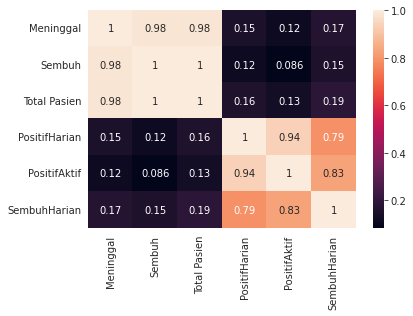

In [31]:
#cek korelasi
korelasi = covid.corr()
sns.heatmap(korelasi, xticklabels=korelasi.columns, yticklabels=korelasi.columns, annot=True)

In [32]:
#Ambil sampel untuk analisis
sampel_covid = covid.sample(int(0.12*len(covid)))

In [33]:
print(len(sampel_covid))

102


[Text(0.5, 1.0, 'Korelasi Sembuh Harian vs Positif Harian')]

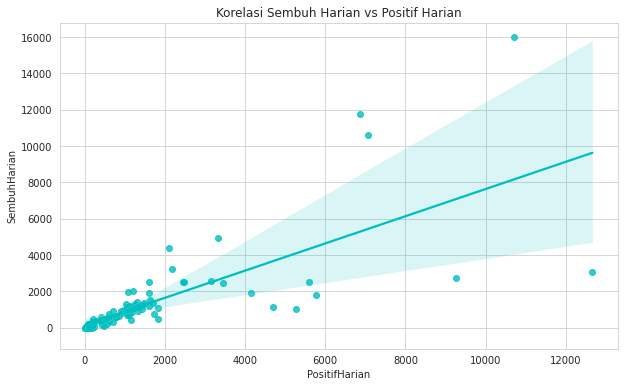

In [34]:
#Korelasi SembuhHarian dan PositifHarian
plt.figure(figsize=(10,6))
sns.regplot(data = sampel_covid, y="SembuhHarian", x="PositifHarian",color="c").set(title="Korelasi SembuhHarian vs PositifHarian")

[Text(0.5, 1.0, 'Korelasi Meninggal vs Sembuh')]

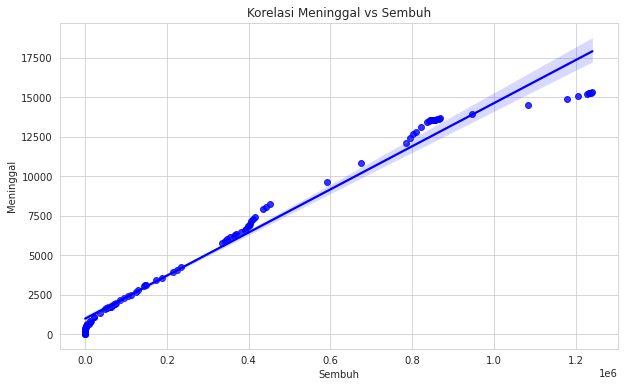

In [35]:
#Korelasi Meninggal dan Sembuh
plt.figure(figsize=(10,6))
sns.regplot(data = sampel_covid, y="Meninggal", x="Sembuh",color="b").set(title="Korelasi Meninggal vs Sembuh")

[Text(0.5, 1.0, 'Korelasi Total Pasien vs Positif Aktif')]

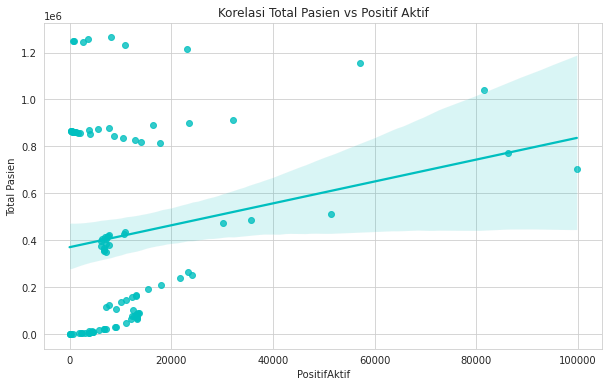

In [36]:
#Korelasi Total Pasien dan Positif Aktif
plt.figure(figsize=(10,6))
sns.regplot(data = sampel_covid, y="Total Pasien", x="PositifAktif",color="c").set(title="Korelasi Total Pasien vs Positif Aktif")

In [37]:
#Format Tanggal, tahun saja
covid.Tanggal=pd.to_datetime(covid.Tanggal)
tahun = covid.Tanggal.dt.year

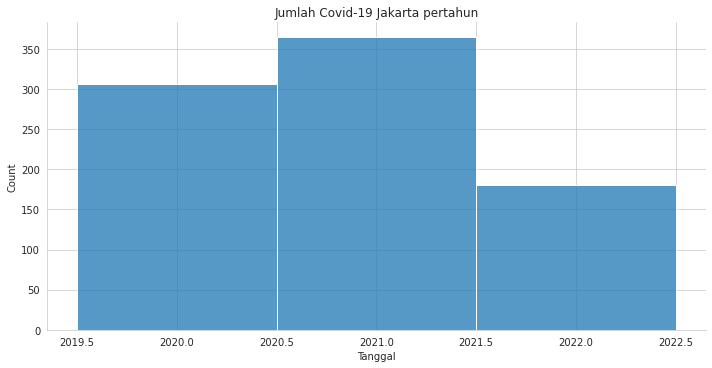

In [38]:
#Jumlah covid-19 di jakarta
sns.displot(tahun,discrete=True,aspect=2,height=5,kind="hist").set(title="Jumlah Covid-19 Jakarta pertahun")

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

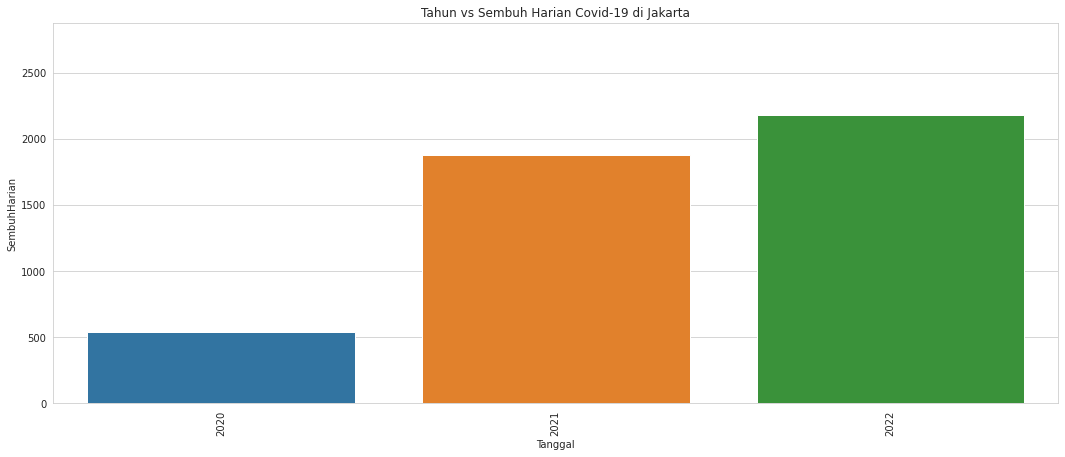

In [40]:
#Covid-19 Jakarta antara banyaknya SembuhHarian pertahun
from IPython.core.pylabtools import figsize
total = covid.SembuhHarian
fig_dims = (18,7)
fig, ax = plt.subplots(figsize = fig_dims)
fig = sns.barplot(x=tahun, y=total, ax = ax, errwidth=False).set(title="Tahun vs Sembuh Harian Covid-19 di Jakarta")
plt.xticks(rotation=90)

(array([2019.75, 2020.  , 2020.25, 2020.5 , 2020.75, 2021.  , 2021.25,
        2021.5 , 2021.75, 2022.  , 2022.25]),
 <a list of 11 Text major ticklabel objects>)

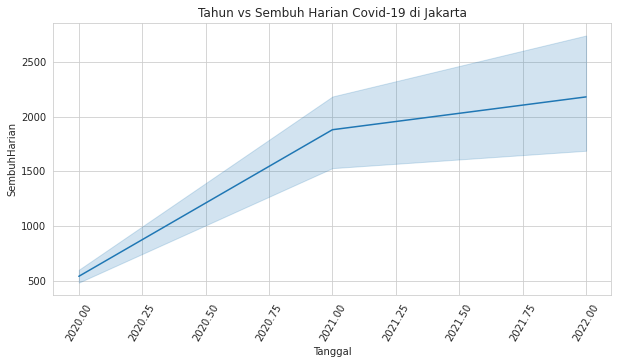

In [41]:
total = covid.SembuhHarian
sns.set_style(style="whitegrid")
fig_dims = (10,5)
fig, ax = plt.subplots(figsize = fig_dims)
fig = sns.lineplot(x=tahun, y=total, ax = ax).set(title="Tahun vs Sembuh Harian Covid-19 di Jakarta")
plt.xticks(rotation=60)

(array([2019.75, 2020.  , 2020.25, 2020.5 , 2020.75, 2021.  , 2021.25,
        2021.5 , 2021.75, 2022.  , 2022.25]),
 <a list of 11 Text major ticklabel objects>)

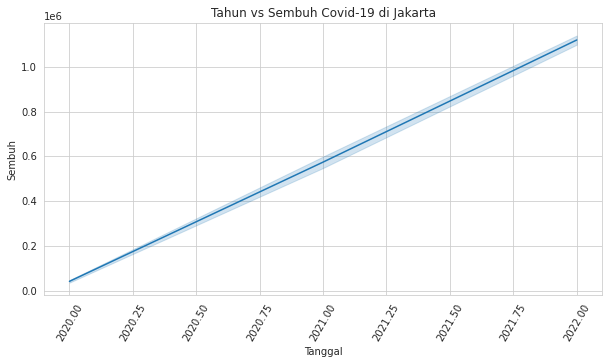

In [49]:
positi_harian = covid.Sembuh
sns.set_style(style="whitegrid")
fig_dims = (10,5)
fig, ax = plt.subplots(figsize = fig_dims)
fig = sns.lineplot(x=tahun, y=positi_harian, ax = ax).set(title="Tahun vs Sembuh Covid-19 di Jakarta")
plt.xticks(rotation=60)

**Conculsion:**

Dari analisis Covid-19 di Jakarta yang telah dilakukan oleh kelompok UltraData, kami dapat menyimpulkan dengan mengambil 3 hasil analisis kami, yaitu sebagai berikut:


1. Data covid terus mengalami kenaikan sejak dimulainya pandemik
2. Jumlah kasus Covid-19 paling banyak berada pada tahun 2019
3. Tahun 2022 pasien sembuh harian akibat covid-19 selalu naik

Dengan hasil tersebut kegiatan ekonomi dapat dilakukan normal kembali, karena jikalau terus dibatasi dapat mengakibatkan menurunnya angka Investasi diberbagai sektor usaha dan melemahnya daya beli masyarakat secara luas.




